In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
X = df.iloc[:,1:]

In [5]:
y = df.iloc[:,0]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)


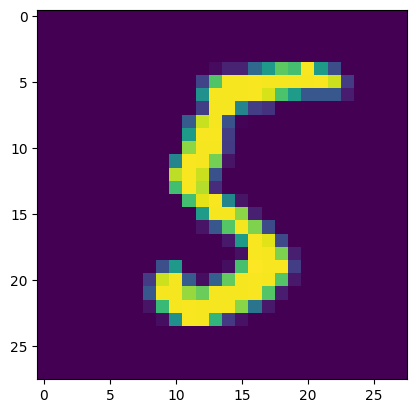

In [7]:
import matplotlib.pyplot as plt 
plt.imshow(df.iloc[10051, 1:].values.reshape(28,28))

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier()

In [10]:
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test, y_pred)

0.9648809523809524

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=400)

In [18]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [19]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [20]:
y_pred1 = knn.predict(X_test_trf)

In [21]:
accuracy_score(y_test, y_pred1)

0.9436904761904762

## Task With Wine Dataset

In [22]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)

In [23]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [24]:
wine.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [25]:
wine.duplicated().sum()

1168

In [26]:
# Drop rows with missing values

wine_df = wine.dropna()

In [27]:
# Drop duplicate rows
wine_df = wine_df.drop_duplicates()

In [28]:
XW = wine_df.iloc[:,1:13]
yw = wine_df.iloc[:,0]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XW, yw, test_size=0.2, random_state=23)


In [30]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Without PCA

In [32]:
Knn = KNeighborsClassifier(n_neighbors=5)

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred = knn.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

0.9933899905571294

## With PCA

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)

In [37]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [38]:
Knn_pca = KNeighborsClassifier(n_neighbors=5)

In [39]:
Knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [40]:
y_pred_pca = Knn_pca.predict(X_test_pca)

In [41]:
accuracy_score(y_test, y_pred_pca)

0.9896128423040604